# 50_오토인코더

![](./lecture_image/50-01.png)
> latent vector : 중앙의 Code 레이어

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()
print(train_X.shape, train_Y.shape)

train_X = train_X / 255.0
test_X = test_X / 255.0

(60000, 28, 28) (60000,)


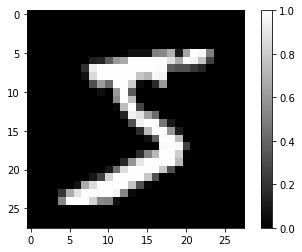

5


In [3]:
import matplotlib.pyplot as plt
plt.imshow(train_X[0].reshape(28, 28), cmap='gray')
plt.colorbar()
plt.show()

print(train_Y[0])

In [4]:
train_X = train_X.reshape(-1, 28 * 28)
test_X = test_X.reshape(-1, 28 * 28)
print(train_X.shape, train_Y.shape)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(784, activation = 'relu', input_shape=(784,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(784, activation = 'sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

(60000, 784) (60000,)
Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-06-21 19:55:03.699558: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-21 19:55:03.700593: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 64)                50240     
                                                                 
 dense_2 (Dense)             (None, 784)               50960     
                                                                 
Total params: 716,640
Trainable params: 716,640
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.fit(train_X, train_X, epochs = 10, batch_size=256)
        # 훈련용 데이터
                    # 훈련용 데이터..?
# 오토인코더는 자기 자신을 재생성하는 네트워크.
# 잠재 벡터가 입력을 축소하는 벡터가 된다.


Epoch 1/10


2022-06-21 19:57:17.792604: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-21 19:57:17.985530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 4s 10ms/step - loss: 0.0506
Epoch 2/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0174
Epoch 3/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0119
Epoch 4/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0098
Epoch 5/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0087
Epoch 6/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0079
Epoch 7/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0073
Epoch 8/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0068
Epoch 9/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0065
Epoch 10/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0062


2022-06-21 20:00:23.269925: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 9ms/step


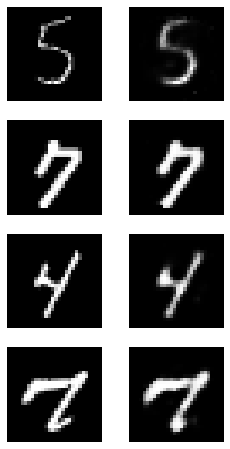

 18/313 [>.............................] - ETA: 0s - loss: 0.0062 

2022-06-21 20:00:23.811779: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step - loss: 0.0060


0.006015771999955177

In [6]:
import random

plt.figure(figsize=(4, 8))
for c in range(4):
    plt.subplot(4, 2, c*2 + 1)
    rand_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28, 28), cmap='gray')
    plt.axis('off')

    plt.subplot(4, 2, c*2 + 2)
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()

model.evaluate(test_X, test_X)

In [9]:
# CNN
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation='relu', input_shape=(28,28,1)),
                            # filters : channel과 같음.
                                                        # strides : 2,2 칸씩 뛰어넘는다는 의미.
                                                        # 28, 28 사이즈에서 2칸씩 뛰어넘으면 14,14 로 변경된다.
    tf.keras.layers.Conv2D(64, 2, (2,2), activation='relu'),
                                # (2,2) : strides= (2,2) 와 같음. 
                                # 14, 14 사이즈에서 2칸씩 뛰어넘으면 7, 7이 된다.
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),       # latent vector 자리
    tf.keras.layers.Dense(7*7*64, activation='relu'),
    tf.keras.layers.Reshape(target_shape=(7,7,64)),
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2,2), padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size = 2, strides=(2,2), padding='same', activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        160       
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 64)          8256      
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_7 (Dense)             (None, 64)                200768    
                                                                 
 dense_8 (Dense)             (None, 3136)              203840    
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 14, 14, 32)      

In [10]:
model.fit(train_X, train_X, epochs = 20, batch_size=256)

Epoch 1/20


2022-06-21 21:26:11.658374: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 6s 13ms/step - loss: 0.0795
Epoch 2/20
235/235 [==============================] - 3s 13ms/step - loss: 0.0328
Epoch 3/20
235/235 [==============================] - 3s 13ms/step - loss: 0.0244
Epoch 4/20
235/235 [==============================] - 3s 14ms/step - loss: 0.0217
Epoch 5/20
235/235 [==============================] - 3s 13ms/step - loss: 0.0196
Epoch 6/20
235/235 [==============================] - 3s 13ms/step - loss: 0.0185
Epoch 7/20
235/235 [==============================] - 3s 14ms/step - loss: 0.0179
Epoch 8/20
235/235 [==============================] - 3s 14ms/step - loss: 0.0175
Epoch 9/20
235/235 [==============================] - 3s 13ms/step - loss: 0.0172
Epoch 10/20
235/235 [==============================] - 3s 14ms/step - loss: 0.0170
Epoch 11/20
235/235 [==============================] - 3s 14ms/step - loss: 0.0168
Epoch 12/20
235/235 [==============================] - 3s 14ms/step - loss: 0.0160
Epoch 13/20
235/235 [===

2022-06-21 21:28:10.150596: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 9ms/step


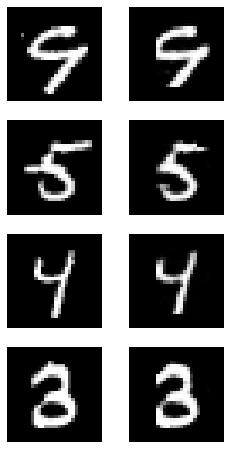

 13/313 [>.............................] - ETA: 1s - loss: 0.0121 

2022-06-21 21:28:10.861858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 0.0141


0.014106960035860538

In [11]:
# result
import random

plt.figure(figsize=(4,8))
for c in range(4):
    plt.subplot(4, 2, c*2 + 1)
    rand_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28, 28), cmap='gray')
    plt.axis('off')

    plt.subplot(4, 2, c*2 + 2)
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()

model.evaluate(test_X, test_X)

# ELU

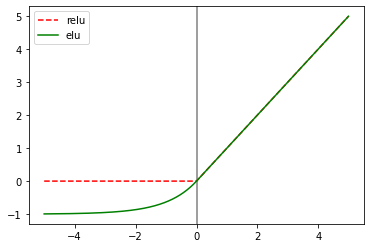

In [12]:
import math

x = np.arange(-5, 5, 0.01)
relu = [0 if z<0 else z for z in x]
elu = [1.0 * (np.exp(z) -1 ) if z < 0 else z for z in x]

plt.axvline(0, color='gray')
plt.plot(x, relu, 'r--', label = 'relu')
plt.plot(x, elu, 'g-', label='elu')
plt.legend()
plt.show()

In [13]:
# CNN
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation='elu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2), activation='elu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='elu'),
    tf.keras.layers.Dense(7 * 7 * 64, activation='elu'),
    tf.keras.layers.Reshape(target_shape=(7, 7, 64)),
    tf.keras.layers.Conv2DTranspose(filters = 32, kernel_size=2, strides=(2,2), padding='same', activation='elu'),
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2,2), padding='same', activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')

model.fit(train_X, train_X, epochs=20, batch_size=256)

Epoch 1/20
  1/235 [..............................] - ETA: 1:56 - loss: 0.2313

2022-06-21 21:34:30.621743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 11s 45ms/step - loss: 0.0572
Epoch 2/20
235/235 [==============================] - 11s 45ms/step - loss: 0.0163
Epoch 3/20
235/235 [==============================] - 11s 46ms/step - loss: 0.0109
Epoch 4/20
235/235 [==============================] - 10s 43ms/step - loss: 0.0091
Epoch 5/20
235/235 [==============================] - 10s 42ms/step - loss: 0.0083
Epoch 6/20
235/235 [==============================] - 10s 41ms/step - loss: 0.0078
Epoch 7/20
235/235 [==============================] - 10s 42ms/step - loss: 0.0074
Epoch 8/20
235/235 [==============================] - 10s 42ms/step - loss: 0.0071
Epoch 9/20
235/235 [==============================] - 10s 42ms/step - loss: 0.0069
Epoch 10/20
235/235 [==============================] - 10s 42ms/step - loss: 0.0067
Epoch 11/20
235/235 [==============================] - 10s 42ms/step - loss: 0.0065
Epoch 12/20
235/235 [==============================] - 10s 42ms/step - loss: 0.0063
Epoch 13/20


1/1 [==============================] - 0s 13ms/step


2022-06-21 21:41:46.005102: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


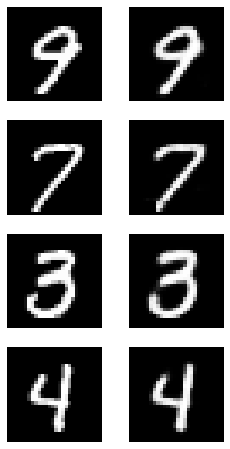

 11/313 [>.............................] - ETA: 3s - loss: 0.0053

2022-06-21 21:41:46.386545: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 10ms/step - loss: 0.0056


0.005553786177188158

In [14]:
import random

plt.figure(figsize=(4,8))
for c in range(4):
    plt.subplot(4, 2, c*2 + 1)
    rand_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28, 28), cmap='gray')
    plt.axis('off')

    plt.subplot(4, 2, c*2+2)
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()

model.evaluate(test_X, test_X)

In [15]:
# 잠재변수 벡터 확보
latent_vector_model = tf.keras.Model(inputs=model.input, outputs=model.layers[3].output)
latent_vector = latent_vector_model.predict(train_X)
print(latent_vector.shape)
print(latent_vector[0])

  36/1875 [..............................] - ETA: 8s

2022-06-21 21:43:20.184146: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 8s 4ms/step
(60000, 64)
[-0.99999994 -1.         27.042908   -0.9999999  26.941225   -0.9264536
 10.172881   -0.9999985  34.84382    12.384949   -0.99999964 10.894336
 -1.         -0.9999999   1.2456822  20.757256   -1.          6.20749
 -0.9999999   4.446994   17.81261    13.471878    8.273453   -0.9998918
  4.843132   25.618542   17.041067   -1.         20.36027    -0.99999994
 -0.9999993  13.326328   -1.          9.521194    9.083147   -1.
 10.084533   -0.9999989  17.952238   24.706661   15.506168   17.658943
 -1.         12.60093    20.741877   21.242271   -0.9999996  24.292847
 23.768177   16.38245    -1.          5.5324316  19.645573   24.915457
 -0.9999996  19.759523   27.33613    -1.         -0.99999994 -0.99999994
 16.191095   -0.99999994 -1.          6.401358  ]


# 군집

In [17]:

%%time
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, n_init=10, random_state = 42)
kmeans.fit(latent_vector)

CPU times: user 13 s, sys: 5.69 s, total: 18.7 s
Wall time: 3.15 s


KMeans(n_clusters=10, random_state=42)

In [18]:
# 군집 결과
print(kmeans.labels_)
print(kmeans.cluster_centers_.shape)
print(kmeans.cluster_centers_[0])

[2 6 5 ... 3 8 1]
(10, 64)
[-0.99991274 -0.9999712  14.57385    -0.9999488  13.868603    0.07394022
  8.582111   -0.99688035 14.177795   13.085033   -0.9995899   9.739817
 -0.99994373 -0.9999065   8.491465   14.693242   -0.9999561   4.3035893
 -0.99992746 11.708423   12.395278   17.384491    3.8689296  -0.99693584
  4.7441387  17.348787    8.577664   -0.99993414 11.377509   -0.9998704
 -0.9997299   9.220913   -0.9999366  10.735195   13.514597   -0.9998746
 23.947031   -0.999467    9.972359    9.292858   13.4894705  14.345297
 -0.9998178   5.027379   21.387533   13.4518585  -0.9999409  11.841558
  8.763676    7.0424757  -0.99992454  9.883602    5.342428   11.993767
 -0.9980085  14.239004   10.954397   -0.9999305  -0.999819   -0.99992806
  7.7455807  -0.9999316  -0.9998975  20.211792  ]


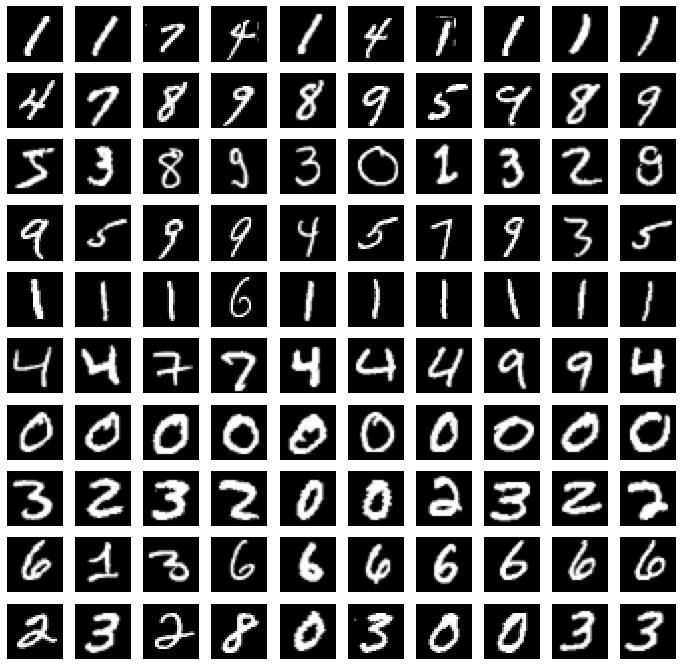

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))

for i in range(10):
    images = train_X[kmeans.labels_ == i]
    for c in range(10):
        plt.subplot(10, 10, i*10 + c + 1)
        plt.imshow(images[c].reshape(28, 28), cmap='gray')
        plt.axis('off')

plt.show()

# t-SNE
- 고차원의 벡터를 저차원으로 옮겨서 시각화에 도움을 주는 방법
- t Stochastic Nearest Neighbor
- k-Means가 각 클러스터를 계산하기 위한 단위로 중심과 각 데이터의 거리를 측정한다면
- t-SNE는 각 데이터의 유사도를 정의하고 원래 공간에서의 유사도와 저차원 공간에서의 유사도가 비슷해지도록 학습시킴
- 여기서 유사도가 수학적으로 확률로 표현됨.

/Users/newrandom/miniforge3/envs/tensorflow-dev/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


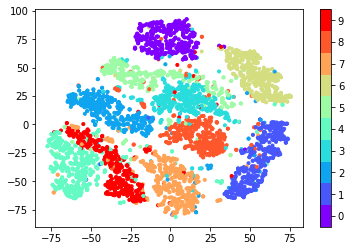

CPU times: user 46.7 s, sys: 16 s, total: 1min 2s
Wall time: 10.4 s


In [21]:
%%time
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=100, perplexity=15, random_state=0)
tsne_vector = tsne.fit_transform(latent_vector[:5000])

cmap=plt.get_cmap('rainbow', 10)
fig = plt.scatter(tsne_vector[:, 0], tsne_vector[:, 1], marker='.', c= train_Y[:5000], cmap=cmap)
cb = plt.colorbar(fig, ticks=range(10))
n_clusters= 10
tick_locs = (np.arange(n_clusters) + 0.5) * (n_clusters - 1) / n_clusters
cb.set_ticks(tick_locs)
cb.set_ticklabels(range(10))

plt.show()

# 오토 인코더의 핵심
- 자기 자신을 넣어 학습을 하고, 가장 좁은 영역 (latent_vector)를 통해 특징을 추출
- 자기 자신을 가장 잘 보여줄 수 있으면서, 차원의 숫자가 줄어든 것

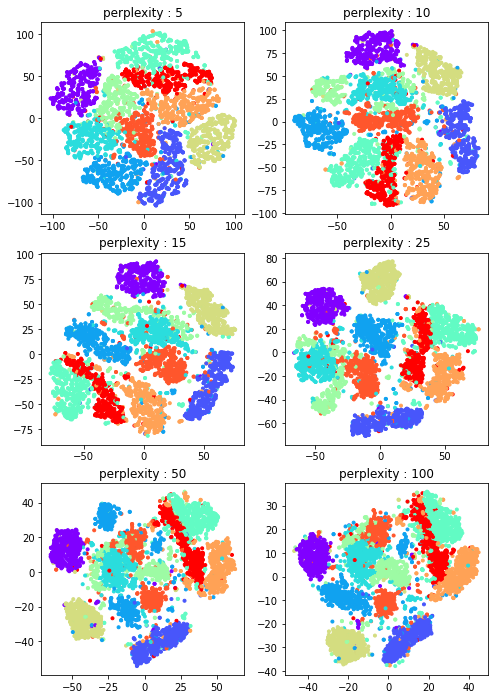

CPU times: user 6min 16s, sys: 2min 14s, total: 8min 30s
Wall time: 1min 12s


In [25]:
%%time
import warnings 
warnings.filterwarnings(action='ignore')

# 최근접 이웃의 숫자 perplexities 튜닝
perplexities = [5, 10, 15, 25, 50, 100]
plt.figure(figsize=(8,12))

for c in range(6):
    tsne = TSNE(n_components=2, learning_rate=100, perplexity=perplexities[c], random_state=0)
    tsne_vector = tsne.fit_transform(latent_vector[:5000])

    plt.subplot(3, 2, c+1)
    plt.scatter(tsne_vector[:, 0], tsne_vector[:, 1], marker='.', c=train_Y[:5000], cmap='rainbow')
    plt.title('perplexity : {0}'.format(perplexities[c]))

plt.show()

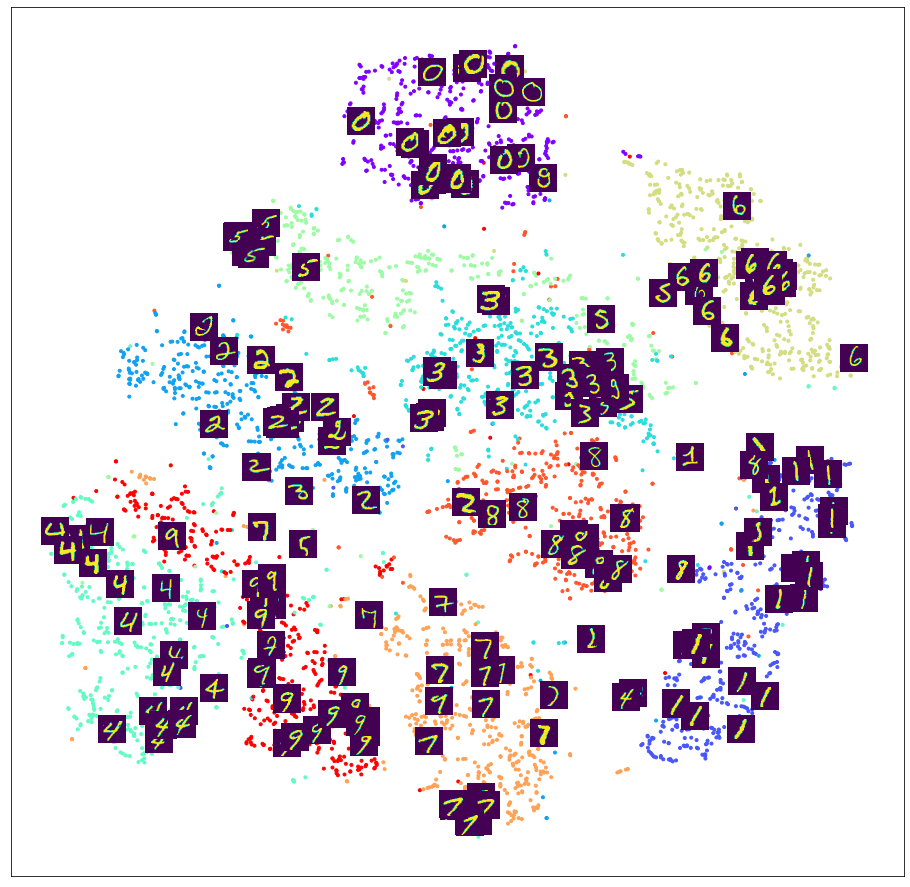

In [26]:
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

plt.figure(figsize=(16, 16))

tsne = TSNE(n_components=2, learning_rate=100, perplexity=15, random_state=0)
tsne_vector = tsne.fit_transform(latent_vector[:5000])

ax = plt.subplot(1, 1, 1)
ax.scatter(tsne_vector[:, 0], tsne_vector[:, 1], marker='.', c=train_Y[:5000], cmap='rainbow')
for i in range(200):
    imagebox = OffsetImage(train_X[i].reshape(28, 28))
    ab = AnnotationBbox(imagebox, (tsne_vector[i, 0], tsne_vector[i, 1]), frameon=False, pad=0.0)
    ax.add_artist(ab)

ax.set_xticks([])
ax.set_yticks([])
plt.show()